In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer

from IPython.display import Image

In [10]:
data = pd.read_excel('practice_dataframe.xlsx')
df = data[['cat11_nationality', 'cat14_temprature', 'num1_8', 'num2_8', 'num3_8']]
df

,cat11_nationality,cat14_temprature,num1_8,num2_8,num3_8
0,german,Very Hot,247.159357,233.346229,731.516449
1,German,cold,668.812973,96.173995,726.139127
2,german,Very Hot,236.218871,1.799639,742.322785
3,German,Very Hot,989.929212,526.862875,767.297661
4,german,cold,88.636793,64.834346,767.944298
...,...,...,...,...,...
995,French,Very Hot,693.456750,62.973627,756.731417
996,German,cold,172.961735,64.458428,713.537068
997,German,Very Hot,196.283378,33.545698,750.001161
998,German,-,-133.377671,426.799833,729.385345


In [6]:
df.describe()

,num1_8,num2_8
count,1000.000000,954.000000
mean,-155.877022,134.374142
std,2207.055467,327.357183
min,-9999.000000,-887.821952
25%,-18.701641,-58.014155
50%,275.546033,137.603801
75%,579.951628,343.120320
max,1835.649006,1206.981624


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cat11_nationality  980 non-null    object 
 1   cat14_temprature   984 non-null    object 
 2   num1_8             1000 non-null   float64
 3   num2_8             954 non-null    float64
 4   num3_8             973 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


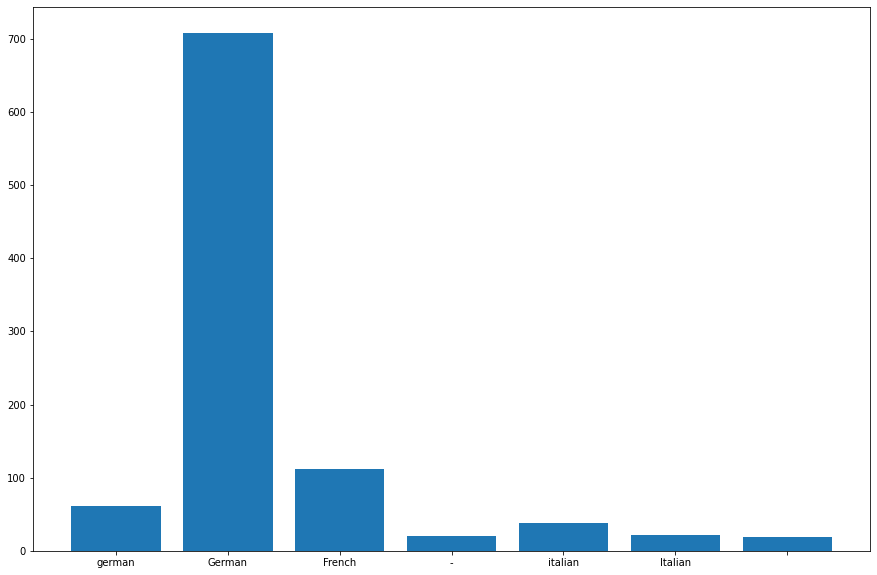

<AxesSubplot:ylabel='cat11_nationality'>

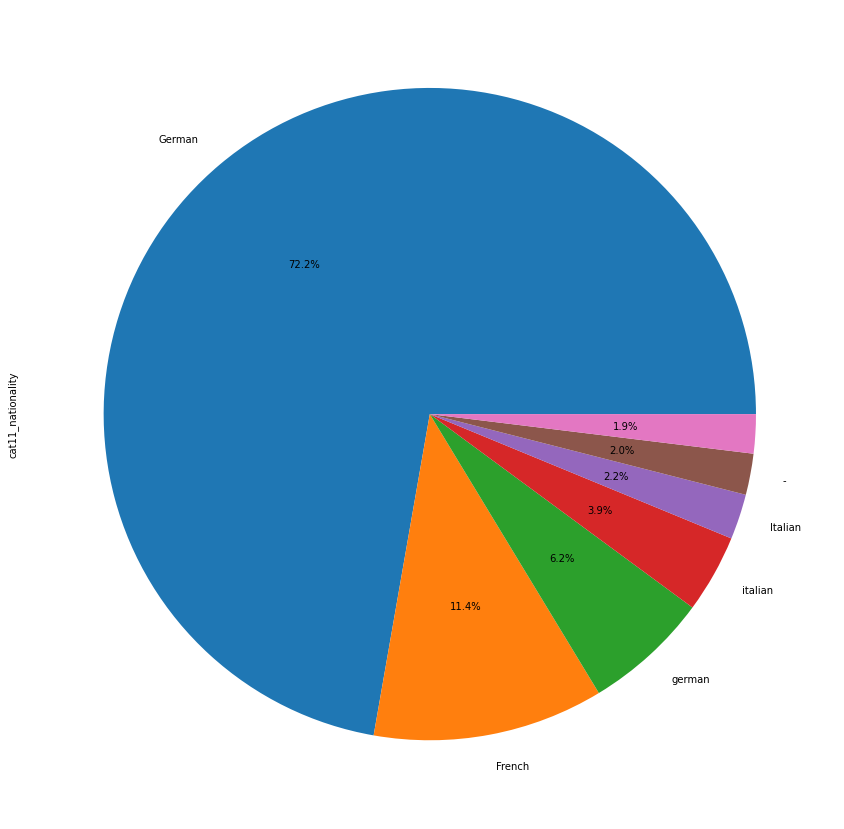

In [37]:
counts = Counter(data['cat11_nationality'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

data['cat11_nationality'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15, 15))

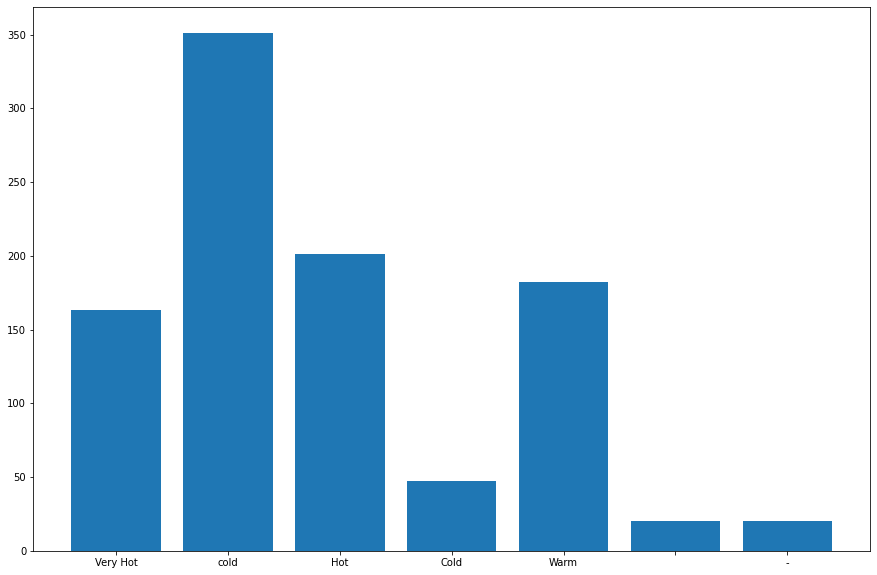

<AxesSubplot:ylabel='cat14_temprature'>

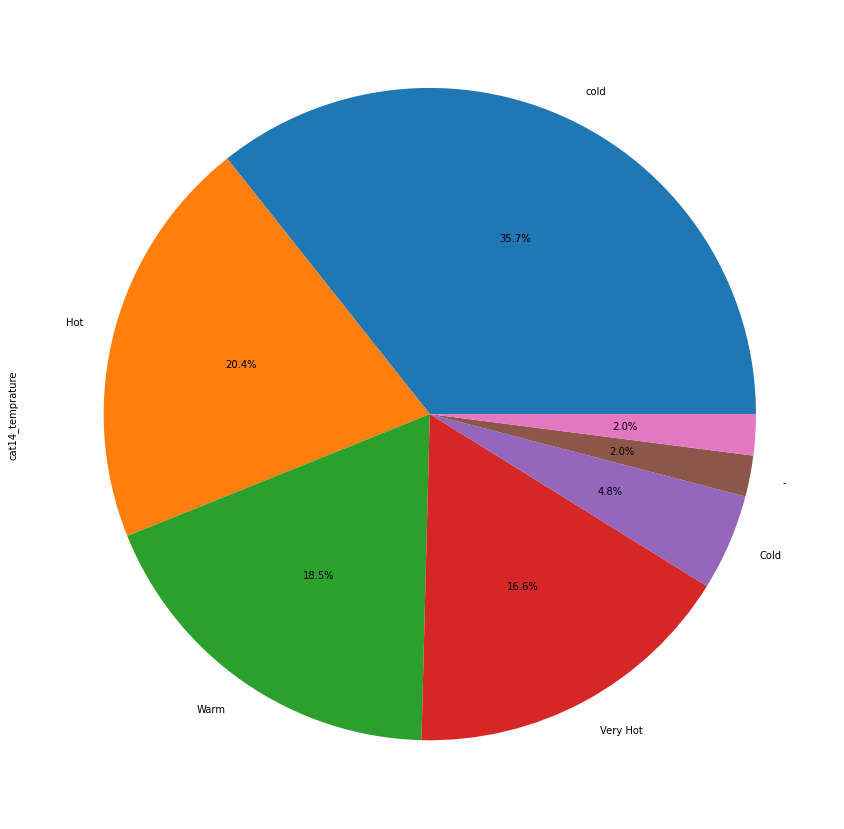

In [25]:
counts = Counter(data['cat14_temprature'].dropna())
plt.figure(figsize=(15, 10))
plt.bar(counts.keys(), counts.values())
plt.show()

data['cat14_temprature'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15, 15))

In [ ]:
data['cat14_temprature'] = data['cat14_temprature'].replace({' ': None})
data['cat14_temprature'] = data['cat14_temprature'].replace({'-': None})
data['cat14_temprature'] = data['cat14_temprature'].replace({'cold': 'Cold'})
data['cat14_temprature'] = data['cat14_temprature'].replace({'-': None})

<AxesSubplot:xlabel='num1_8', ylabel='Count'>

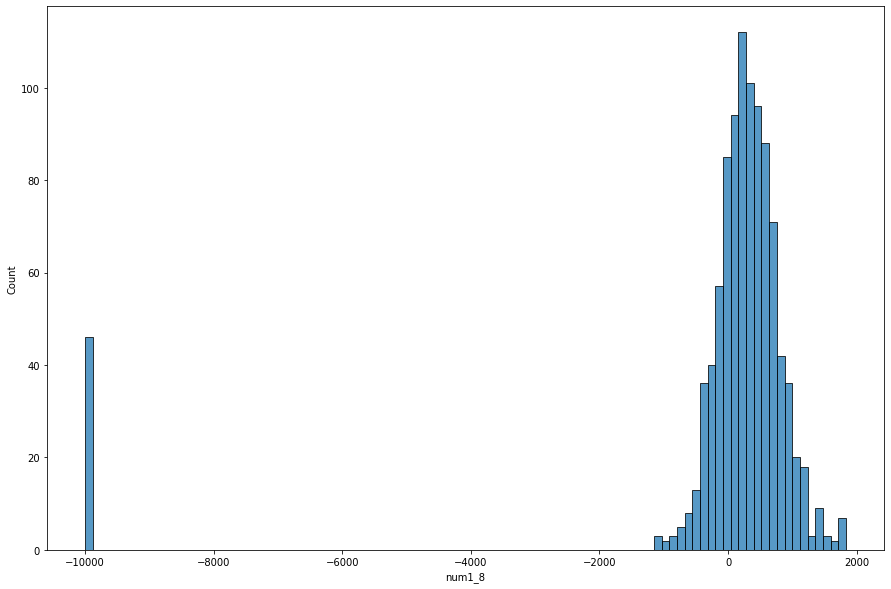

In [45]:
plt.figure(figsize=(15, 10))
sns.histplot(data['num1_8'])

<AxesSubplot:ylabel='num1_8'>

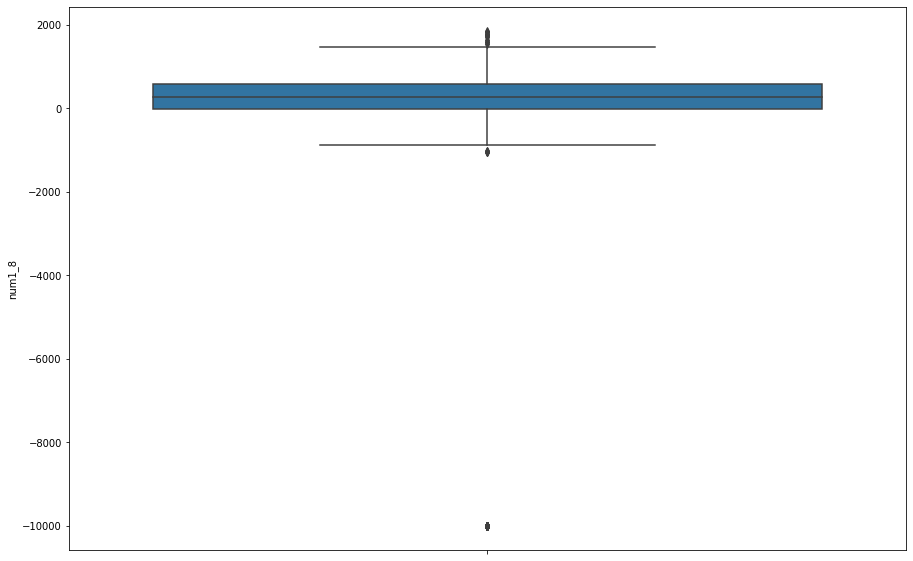

In [47]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['num1_8'])

<AxesSubplot:xlabel='num2_8', ylabel='Count'>

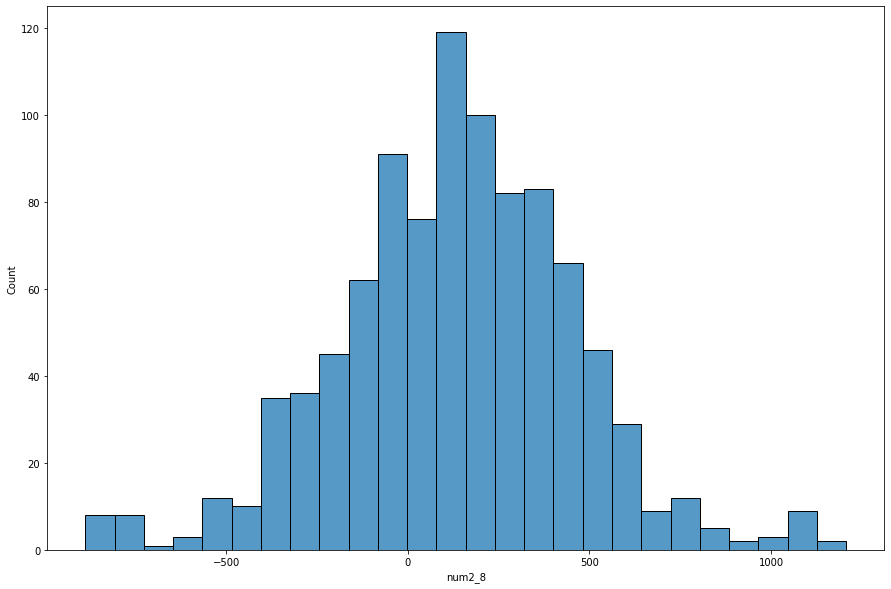

In [48]:
plt.figure(figsize=(15, 10))
sns.histplot(data['num2_8'])

<AxesSubplot:ylabel='num2_8'>

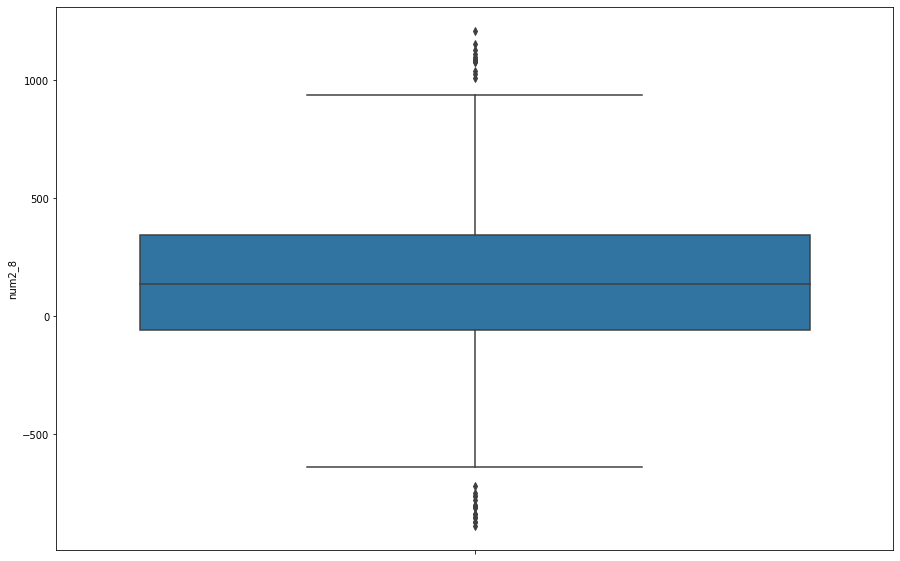

In [49]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['num2_8'])

<AxesSubplot:xlabel='num3_8', ylabel='Count'>

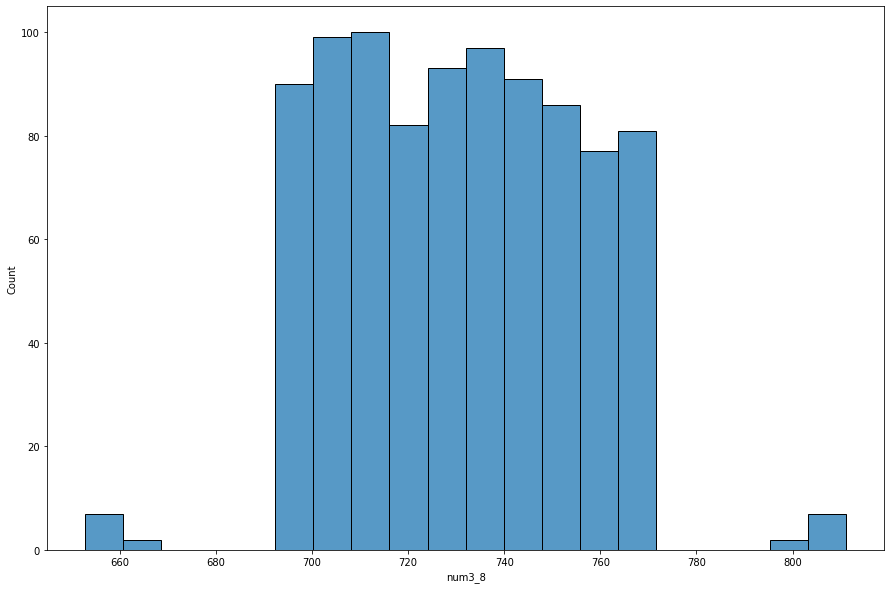

In [61]:
plt.figure(figsize=(15, 10))
data['num3_8'] = data['num3_8'].replace({' ': None})
data['num3_8'] = data['num3_8'].replace({'-': None})
sns.histplot(data['num3_8'])

<AxesSubplot:ylabel='num3_8'>

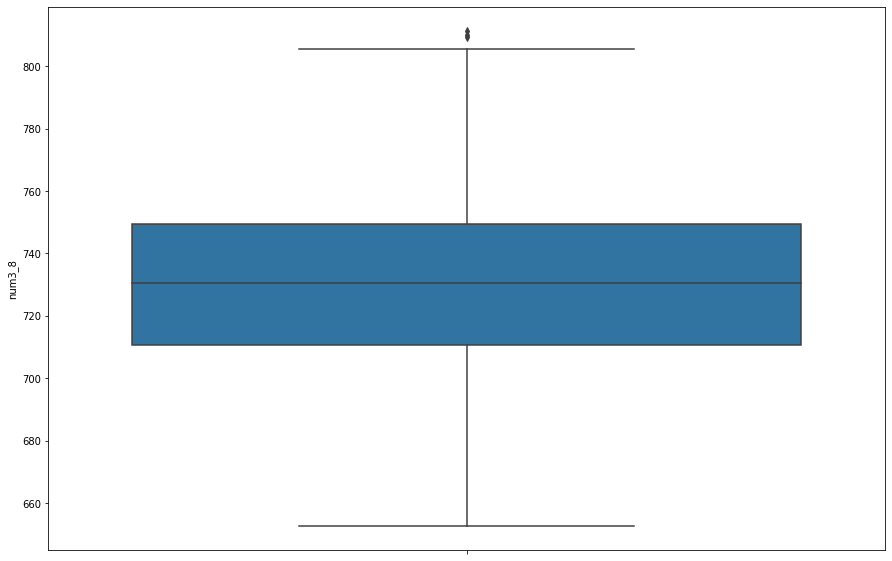

In [62]:
plt.figure(figsize=(15, 10))
sns.boxplot(y=data['num3_8'])